SEÇMELİ ARAMA


Resim piramidi ve kayan pencere algoritmalarına alternatif bir yöntemdir.
Beş temel Benzerlik ölçüsünü dayanır:
* Renk
* Doku
* Şekil
* Boyut
* Bunların kombinasyonları

In [1]:
import cv2
import random
import matplotlib.pyplot as plt


In [2]:
import os
def file_path_write(file_name):
    file_path = f"media/{file_name}"
    current_directory = os.getcwd() # Bulunduğum dizin
    previous_directory = os.path.dirname(current_directory)# üst dizini
    absolute_path = os.path.join(previous_directory, file_path) #yolları birleştirir
    return absolute_path

In [3]:
# Görüntülemek için fonksiyon
def display(img,description="", cmap="viridis"):
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.axis("off")  # Eksenleri kapatır.
    plt.title(description)
    plt.show()

In [4]:
image = cv2.imread(file_path_write("pyramid.jpg"))
image = cv2.resize(image, (600, 600))

In [5]:
# Selective Search Segmentation nesnesini oluşturun
import cv2.ximgproc.segmentation as ds
ss = ds.createSelectiveSearchSegmentation()
# Temel görüntüyü ayarlayın
ss.setBaseImage(image)

# Selective Search modunu seçin (Kaliteli mod, daha yavaş ama daha doğru sonuçlar)
ss.switchToSelectiveSearchQuality()

start


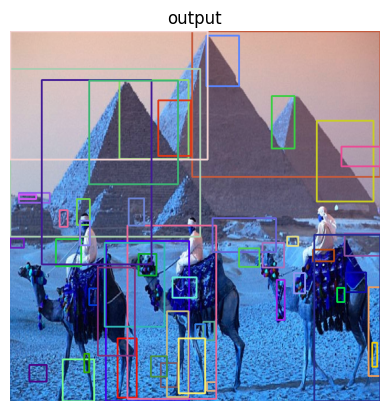

In [7]:
print("start")
rects = ss.process()

output= image.copy()

for (x,y,w,h) in rects[:50]:

    color = [random.randint(0,255) for j in range(0,3)]
    cv2.rectangle(output, (x,y), (x+w,y+h), color,2)

display(output, "output")
